In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read dataset
df = pd.read_csv('dataset/dataset.csv', encoding='latin1', header=None, low_memory=False)
df.columns = [
    "delivery_id",
    "reference",
    "destination_postal_code",
    "client_id",
    "location",
    "parcel_weight",
    "incidence",
    "incidence_date",
    "incidence_time",
    "origin_site",
    "destination_site",
    "latitude",
    "longitude",
    "column"
]
df.drop(columns=['reference', 'column'], inplace=True)

# Filter dataset
filtered_df = df[df['incidence_date'].isin([20250303, 20250304])]

# Preprocess dataset
filtered_df["incidence_time"] = filtered_df["incidence_time"].astype(str).apply(lambda x: ':'.join([x.zfill(6)[i:i+2] for i in range(0, 6, 2)]))
filtered_df["incidence_date"] = filtered_df["incidence_date"].astype(str).apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}")
filtered_df["incidence_timestamp"] = pd.to_datetime(
    filtered_df["incidence_date"] + "T" + filtered_df["incidence_time"],
    format='%Y-%m-%dT%H:%M:%S'
)

filtered_df = filtered_df.reindex(columns=[
    "delivery_id",
    "client_id",
    "incidence_date",
    "incidence_time",
    "incidence_timestamp",
    "incidence",
    "parcel_weight",
    "destination_postal_code",
    "location",
    "origin_site",
    "destination_site",
    "latitude",
    "longitude"
])

# Aggregate incidence by incidence major type
incidence_map = {str(i): f"{i}00" for i in range(0, 8)}
filtered_df['incidence'] = filtered_df['incidence'].apply(lambda x: incidence_map.get(str(x)[0], x))

/tmp/ipykernel_38772/2001283468.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["incidence_time"] = filtered_df["incidence_time"].astype(str).apply(lambda x: ':'.join([x.zfill(6)[i:i+2] for i in range(0, 6, 2)]))
/tmp/ipykernel_38772/2001283468.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["incidence_date"] = filtered_df["incidence_date"].astype(str).apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}")
/tmp/ipykernel_38772/2001283468.py:27: SettingWithCopyWarning: 
A value is try

In [3]:
filtered_df

,delivery_id,client_id,incidence_date,incidence_time,incidence_timestamp,incidence,parcel_weight,destination_postal_code,location,origin_site,destination_site,latitude,longitude
4,6,03277801,2025-03-03,00:01:33,2025-03-03 00:01:33,700,0.0,P36YH04,"KILLEAGH, CORK",NaN,NaN,0.0,0.0
5,7,03277801,2025-03-03,00:01:33,2025-03-03 00:01:33,700,0.0,92130,ISSY LES MOULINEAUX,NaN,NaN,0.0,0.0
6,8,03236401,2025-03-03,00:01:33,2025-03-03 00:01:33,700,0.0,4935-169,DARQUE,NaN,NaN,0.0,0.0
7,9,03236401,2025-03-03,00:01:33,2025-03-03 00:01:33,700,0.0,2615-312,ALVERCA DO RIBATEJO,NaN,NaN,0.0,0.0
8,10,03236401,2025-03-03,00:01:33,2025-03-03 00:01:33,700,0.0,7830-320,SERPA,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132307,188436,03182817,2025-03-04,23:52:53,2025-03-04 23:52:53,HUB,0.0,30100,ALES,NaN,NaN,0.0,0.0
1132308,173076,03182817,2025-03-04,23:54:14,2025-03-04 23:54:14,HUB,0.0,30900,NIMES,NaN,NaN,0.0,0.0
1132309,303227,03182817,2025-03-04,23:53:13,2025-03-04 23:53:13,HUB,0.0,94300,VINCENNES,NaN,NaN,0.0,0.0
1132310,160703,03182817,2025-03-04,23:54:15,2025-03-04 23:54:15,HUB,0.0,13090,AIX EN PROVENCE,NaN,NaN,0.0,0.0


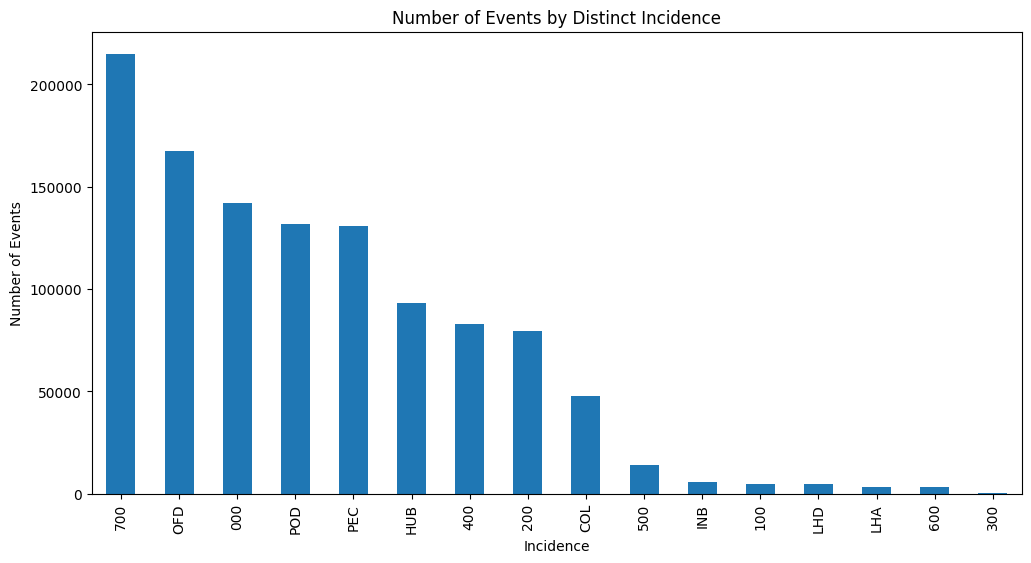

In [4]:
# Count the number of events by distinct incidence
incidence_counts = filtered_df['incidence'].value_counts(ascending=False)

# Plot the results
incidence_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Incidence')
plt.ylabel('Number of Events')
plt.title('Number of Events by Distinct Incidence')
plt.show()

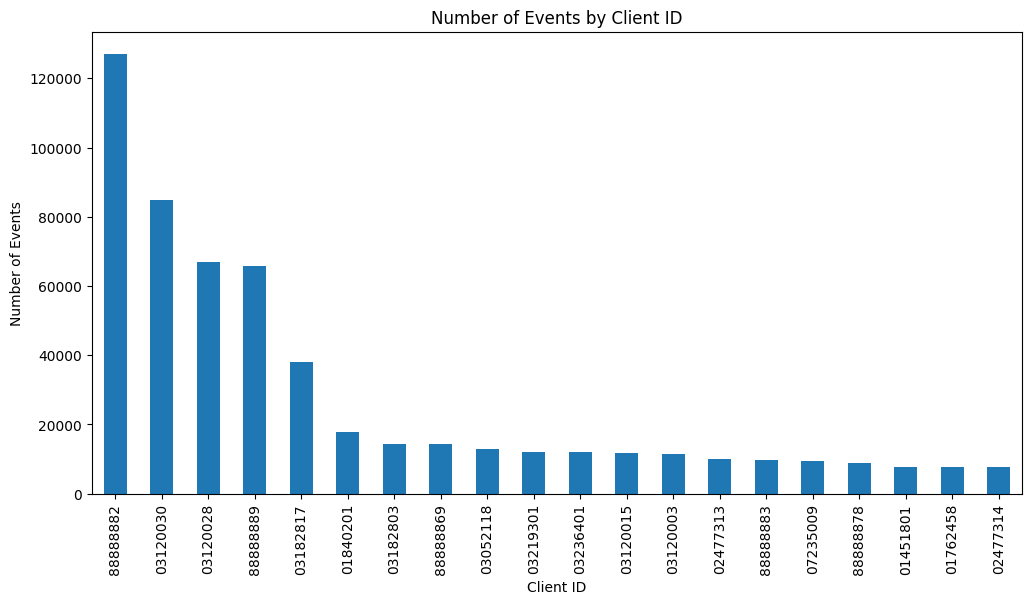

In [5]:
# Count the number of events by client_id
client_id_counts = filtered_df['client_id'].value_counts(ascending=False)[:20]

# Plot the results
client_id_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Client ID')
plt.ylabel('Number of Events')
plt.title('Number of Events by Client ID')
plt.show()

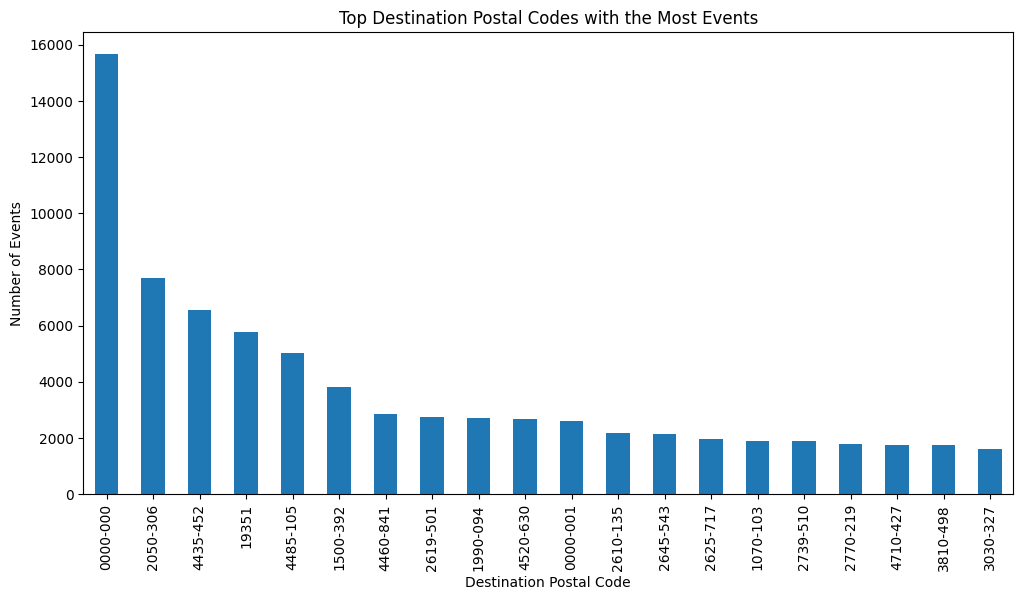

In [6]:
# Plot the top destination postal codes with the most events
postal_code_counts = filtered_df['destination_postal_code'].value_counts(ascending=False)[:20]
postal_code_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Destination Postal Code')
plt.ylabel('Number of Events')
plt.title('Top Destination Postal Codes with the Most Events')
plt.show()

In [7]:
pd.DataFrame(filtered_df['location'].where(filtered_df['destination_postal_code'] == '0000-000').unique(), columns=['Location'])

,Location
0,NaN
1,DUNGARVAN
2,WARSAW
3,POZNAN
4,BRUXELLES
5,M¨CISZEWICE
6,KALISZ
7,KRAK¢W
8,Sofia
9,LJUBLJANA


In [8]:
filtered_df.to_parquet('dataset/cleaned_dataset.parquet', index=False)
filtered_df.to_csv('dataset/cleaned_dataset.csv', index=False)